In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.simple_keypoint_dataset import SimpleKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'keypoint_detection_results'
keypoint_3d_path = dataset_root_path / 'annotations'
bbox_path = dataset_root_path / 'person_detection_results'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 5
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/'


train_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_train.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)
val_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_val.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)
test_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_test.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    bbox_file=(bbox_path / 'ground_truth_human_detection_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    bbox_format='xyxy',
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234


292817
000000292817.jpg
0.0 0.0
[[0.     0.     0.0295]
 [0.     0.     0.0293]
 [0.     0.     0.0293]
 [0.     0.     0.0268]
 [0.     0.     0.0268]
 [0.     0.     0.0181]
 [0.     0.     0.0181]
 [0.     0.     0.0218]
 [0.     0.     0.0218]
 [0.     0.     0.01  ]
 [0.     0.     0.01  ]
 [0.     0.     0.0147]
 [0.     0.     0.0147]]
292905
000000292905.jpg
0.0 0.0
[[0.     0.     0.028 ]
 [0.     0.     0.0244]
 [0.     0.     0.0244]
 [0.     0.     0.0218]
 [0.     0.     0.0218]
 [0.     0.     0.0257]
 [0.     0.     0.0257]
 [0.     0.     0.0155]
 [0.     0.     0.0155]
 [0.     0.     0.0056]
 [0.     0.     0.0056]
 [0.     0.     0.01  ]
 [0.     0.     0.01  ]]
306626
000000306626.jpg
0.0 0.0
[[0.     0.     0.0304]
 [0.     0.     0.025 ]
 [0.     0.     0.025 ]
 [0.     0.     0.0279]
 [0.     0.     0.0279]
 [0.     0.     0.0141]
 [0.     0.     0.0141]
 [0.     0.     0.0145]
 [0.     0.     0.0145]
 [0.     0.     0.0086]
 [0.     0.     0.0086]
 [0.     0.   

/workspace/modules/lifter_2d_3d/dataset/simple_keypoint_dataset.py:118: RuntimeWarning: invalid value encountered in divide
  keypoints2D[:, 0] = keypoints2D[:, 0] / w
/workspace/modules/lifter_2d_3d/dataset/simple_keypoint_dataset.py:119: RuntimeWarning: invalid value encountered in divide
  keypoints2D[:, 1] = keypoints2D[:, 1] / h


340572
000000340572.jpg
0.0 0.0
[[0.     0.     0.0303]
 [0.     0.     0.0298]
 [0.     0.     0.0298]
 [0.     0.     0.027 ]
 [0.     0.     0.027 ]
 [0.     0.     0.0238]
 [0.     0.     0.0238]
 [0.     0.     0.015 ]
 [0.     0.     0.015 ]
 [0.     0.     0.0112]
 [0.     0.     0.0112]
 [0.     0.     0.014 ]
 [0.     0.     0.014 ]]
510963
000000510963.jpg
0.0 0.0
[[0.     0.     0.0306]
 [0.     0.     0.0289]
 [0.     0.     0.0289]
 [0.     0.     0.0282]
 [0.     0.     0.0282]
 [0.     0.     0.017 ]
 [0.     0.     0.017 ]
 [0.     0.     0.0133]
 [0.     0.     0.0133]
 [0.     0.     0.009 ]
 [0.     0.     0.009 ]
 [0.     0.     0.0106]
 [0.     0.     0.0106]]
540629
000000540629.jpg
0.0 0.0
[[0.     0.     0.0159]
 [0.     0.     0.0227]
 [0.     0.     0.0227]
 [0.     0.     0.0132]
 [0.     0.     0.0132]
 [0.     0.     0.0369]
 [0.     0.     0.0369]
 [0.     0.     0.022 ]
 [0.     0.     0.022 ]
 [0.     0.     0.0126]
 [0.     0.     0.0126]
 [0.     0.   

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 75000 val_dataset 37500 test_dataset 30349


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2629.987955093384


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/workspace/modules/lifter_2d_3d/utils/evaluation.py:55: RuntimeWarning: Mean of empty slice
  mpjpe = np.nanmean(np.array(self.mpjpe)) * 1000
`Trainer.fit` stopped: `max_epochs=5` reached.


check #1
training loss from 5855 batches: nan
val MPJPE from: 37440 samples : nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_12/checkpoints/epoch=4-step=5855.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_12/checkpoints/epoch=4-step=5855.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: nan
PJPE
                PJPE
nose             NaN
left_eye         NaN
right_eye        NaN
left_ear         NaN
right_ear        NaN
left_shoulder    NaN
right_shoulder   NaN
left_elbow       NaN
right_elbow      NaN
left_wrist       NaN
right_wrist      NaN
left_hip         NaN
right_hip        NaN
activities_mpjpe:
{}
test mpjpe: nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │            nan            │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': nan}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,NaN
left_eye,NaN
right_eye,NaN
left_ear,NaN
right_ear,NaN
left_shoulder,NaN
right_shoulder,NaN
left_elbow,NaN
right_elbow,NaN
left_wrist,NaN


In [4]:
trainer.model.test_history[0]['mpjpe']

nan

[459.1552, 331.3295, 853.5844, 739.9497]
[634.5447, 268.0655, 842.3792, 741.0789]
[922.775, 148.8906, 1334.4067, 985.0064]


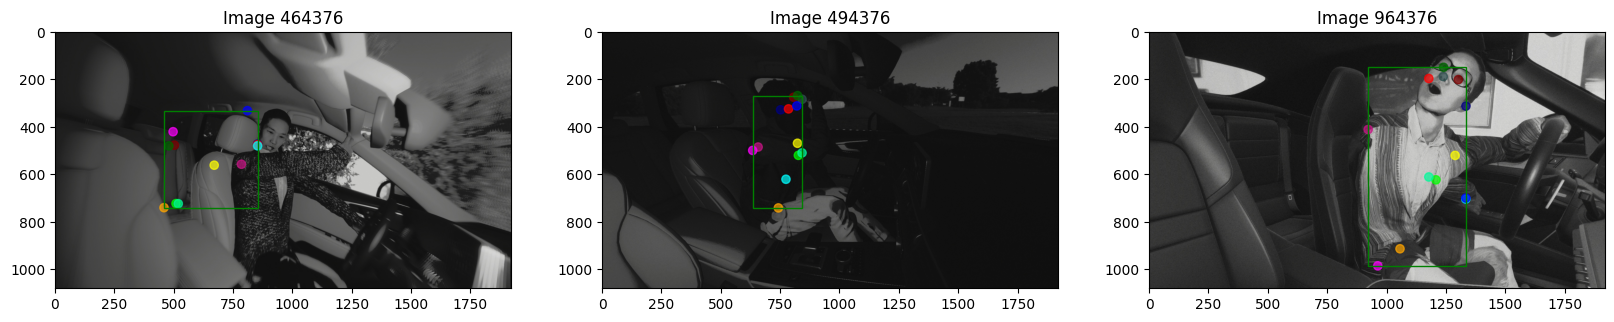

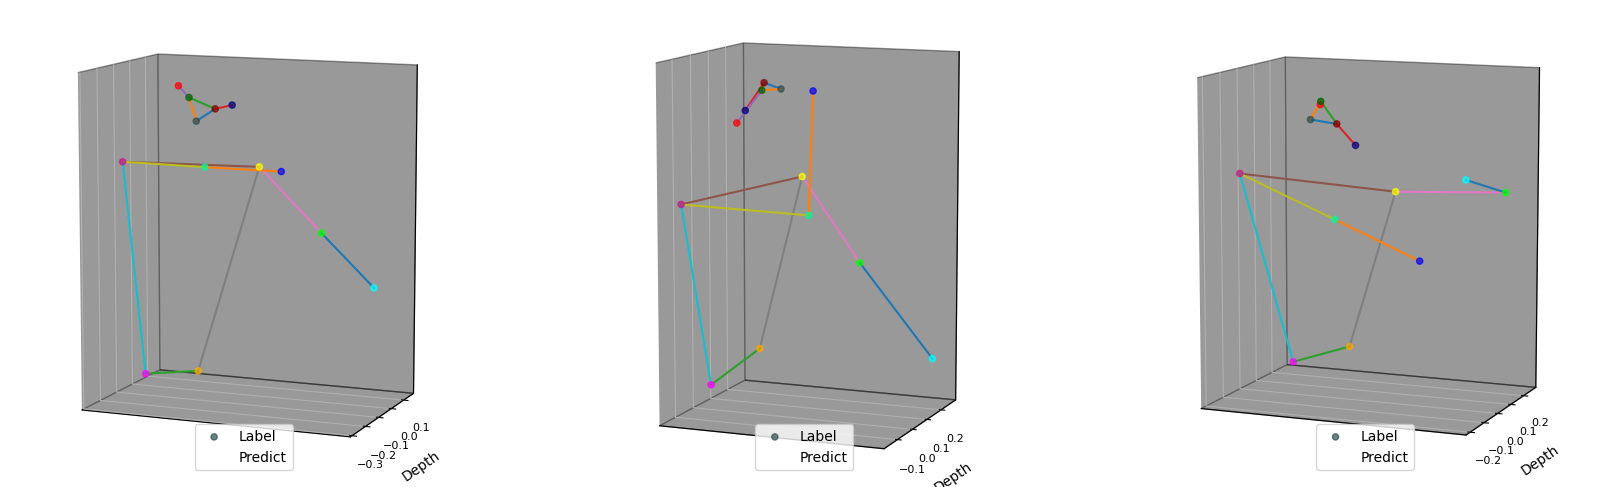

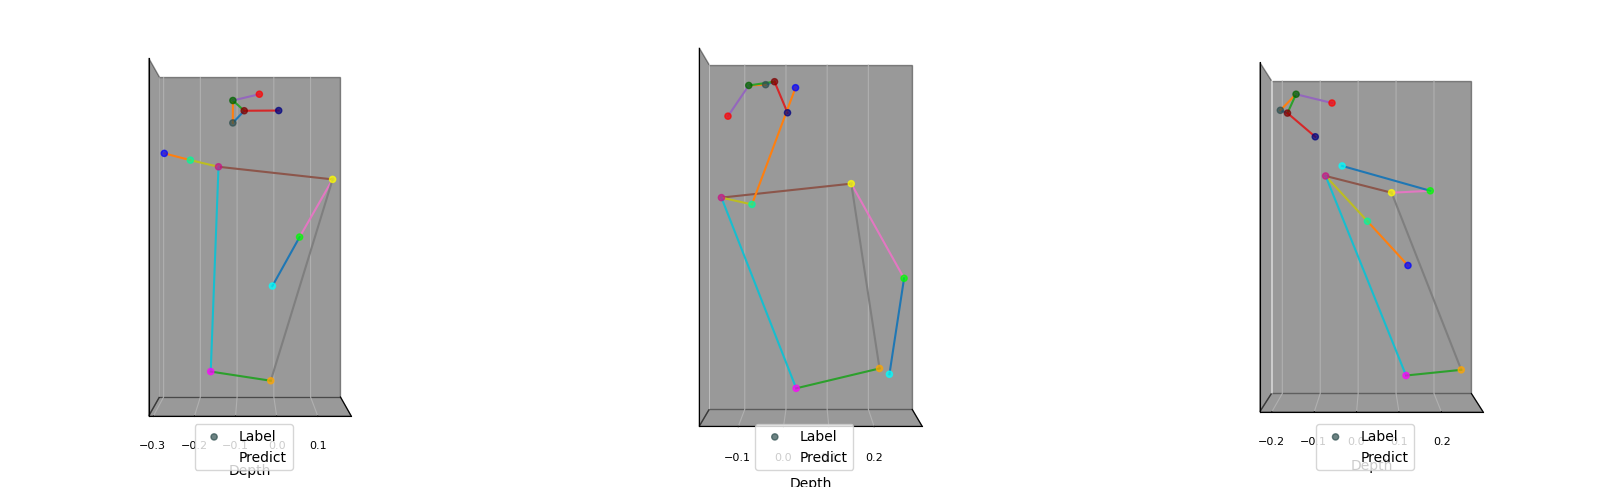

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)